# Forest area by country
This notebook prepares data for this visu : https://bl.ocks.org/rhuille/583877d1d5f82d186a87d6145055340f

In [1]:
from pandas import *
from numpy import *
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
geo = {"code":[]}
with open('countries.json') as data_file:    
    for i in json.load(data_file)["features"]:
        geo["code"]+=[i["id"]]
geo = DataFrame(geo)
geo.head()

,code
0,AFG
1,AGO
2,ALB
3,ARE
4,ARG


In [3]:
geo.shape

(180, 1)

In [4]:
year = "2013"

Surface

In [5]:
surface = DataFrame.from_csv("API_AG.SRF.TOTL.K2_DS2_en_csv_v2.csv", encoding="iso-8859-9", header = 2)[[year, "Country Code"]]
surface[year] = surface[year].apply(lambda x: round(x, 0) )
surface.index = Series(range(surface.shape[0]))
surface.columns = Index(["surface", "code"])
surface.head()

,surface,code
0,180.0,ABW
1,470.0,AND
2,652860.0,AFG
3,1246700.0,AGO
4,28750.0,ALB


Land

In [6]:
land =DataFrame.from_csv("API_AG.LND.TOTL.K2_DS2_en_csv_v2.csv", encoding="iso-8859-9", header = 2)[[year, "Country Code"]]
land[year] = land[year].apply(lambda x: round(x, 2) )
land.index = Series(range(land.shape[0]))
land.columns = Index(["land", "code"])
land.head()

,land,code
0,180.0,ABW
1,470.0,AND
2,652860.0,AFG
3,1246700.0,AGO
4,27400.0,ALB


Agricultural area

In [7]:
agri = DataFrame.from_csv("API_AG.LND.AGRI.ZS_DS2_en_csv_v2.csv", encoding="iso-8859-9", header = 2)[[year, "Country Code"]]
agri[year] = agri[year].apply(lambda x: round(x, 2) )
agri.index = Series(range(agri.shape[0]))
agri.columns = Index(["agri", "code"])
agri.head()

,agri,code
0,11.11,ABW
1,44.26,AND
2,58.07,AFG
3,47.48,AGO
4,43.33,ALB


Forest area

In [8]:
forest = DataFrame.from_csv("API_AG.LND.FRST.ZS_DS2_en_csv_v2.csv", encoding="iso-8859-9", header = 2)[[year, "Country Code"]]
forest.index = Series(range(forest.shape[0]))
forest[year] = forest[year].apply(lambda x: round(x, 2) )
forest.columns = Index(["forest", "code"])
forest.head()

,forest,code
0,2.33,ABW
1,34.04,AND
2,2.07,AFG
3,46.61,AGO
4,28.23,ALB


In [9]:
dataForest = merge(geo,merge(merge(surface, agri, how="inner"), merge(land, forest, how="inner"), how="inner"), how="inner")
dataForest.head()

,code,surface,agri,land,forest
0,AFG,652860.0,58.07,652860.0,2.07
1,AGO,1246700.0,47.48,1246700.0,46.61
2,ALB,28750.0,43.33,27400.0,28.23
3,ARE,83600.0,4.57,83600.0,3.83
4,ARG,2780400.0,54.52,2736690.0,10.12


In [10]:
dataForest.shape

(171, 5)

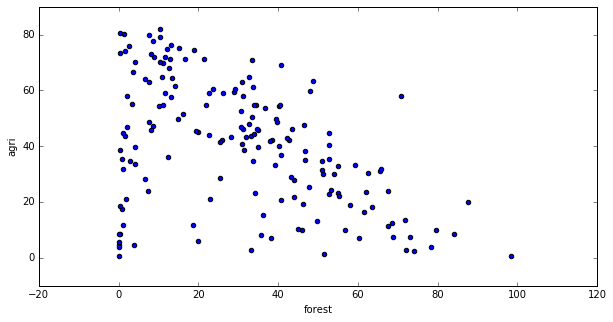

In [11]:
dataForest.plot(kind="scatter", x = "forest", y ="agri", figsize=(10,5))
plt.show()

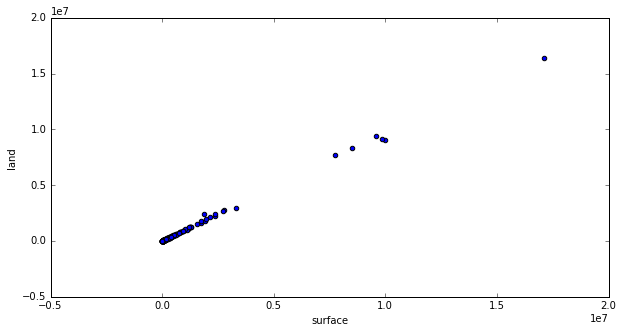

In [12]:
dataForest.plot(kind="scatter", x = "surface", y ="land", figsize=(10,5))
plt.show()

In [13]:
dataForest.to_csv("dataForest.csv", index = False)